In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./Indian_Names.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6486 entries, 0 to 6485
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6486 non-null   int64 
 1   Name        6485 non-null   object
dtypes: int64(1), object(1)
memory usage: 101.5+ KB


In [3]:
df.dropna(inplace=True)
df.head()

,Unnamed: 0,Name
0,0,aabid
1,1,aabida
2,2,aachal
3,3,aadesh
4,4,aadil


In [4]:
names = df["Name"].values
names = [i for i in names if i.isalpha()]
names[:9]

['aabid',
 'aabida',
 'aachal',
 'aadesh',
 'aadil',
 'aadish',
 'aaditya',
 'aaenab',
 'aafreen']

In [5]:
# creating bigrams

bigrams = {}
for n in names:
    name = ["<S>"] + list(n) + ["<E>"] # metacharecters for start and end of a word
    for ch1, ch2 in zip(name, name[1:]):
        bigram = (ch1, ch2)
        bigrams[bigram] = bigrams.get(bigram, 0) + 1

In [6]:
bigrams = sorted(bigrams.items(), key=lambda x: -x[1])
bigrams

[(('a', '<E>'), 1552),
 (('a', 'n'), 1401),
 (('s', 'h'), 1233),
 (('<S>', 's'), 1217),
 (('h', 'a'), 1169),
 (('r', 'a'), 1011),
 (('a', 'r'), 932),
 (('i', '<E>'), 919),
 (('n', 'a'), 711),
 (('a', 'm'), 658),
 (('m', 'a'), 629),
 (('n', '<E>'), 626),
 (('s', 'a'), 602),
 (('<S>', 'a'), 586),
 (('r', '<E>'), 574),
 (('a', 'l'), 549),
 (('<S>', 'm'), 549),
 (('<S>', 'r'), 548),
 (('e', 'e'), 502),
 (('i', 'n'), 478),
 (('h', 'i'), 421),
 (('h', '<E>'), 406),
 (('a', 's'), 403),
 (('n', 'd'), 402),
 (('k', 'a'), 400),
 (('<S>', 'b'), 398),
 (('r', 'i'), 395),
 (('l', '<E>'), 394),
 (('t', 'a'), 387),
 (('l', 'a'), 383),
 (('a', 't'), 382),
 (('<S>', 'k'), 378),
 (('<S>', 'p'), 377),
 (('y', 'a'), 371),
 (('<S>', 'n'), 360),
 (('m', '<E>'), 345),
 (('j', 'a'), 343),
 (('n', 'i'), 324),
 (('e', 'n'), 318),
 (('p', 'a'), 316),
 (('d', 'e'), 312),
 (('e', 'r'), 306),
 (('t', '<E>'), 301),
 (('<S>', 'j'), 297),
 (('<S>', 'd'), 296),
 (('a', 'j'), 289),
 (('u', '<E>'), 287),
 (('i', 's'), 28

In [7]:
import torch # hehe bweoi

In [8]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [9]:
chars = sorted(list(set("".join(names))))
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi["."] = 0 # special charecter to denote start and end
itos = {i: s for s, i in stoi.items()}

itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [10]:
for n in names:
    chs = ["."] + list(n) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        N[idx1, idx2] += 1

(-0.5, 26.5, 26.5, -0.5)

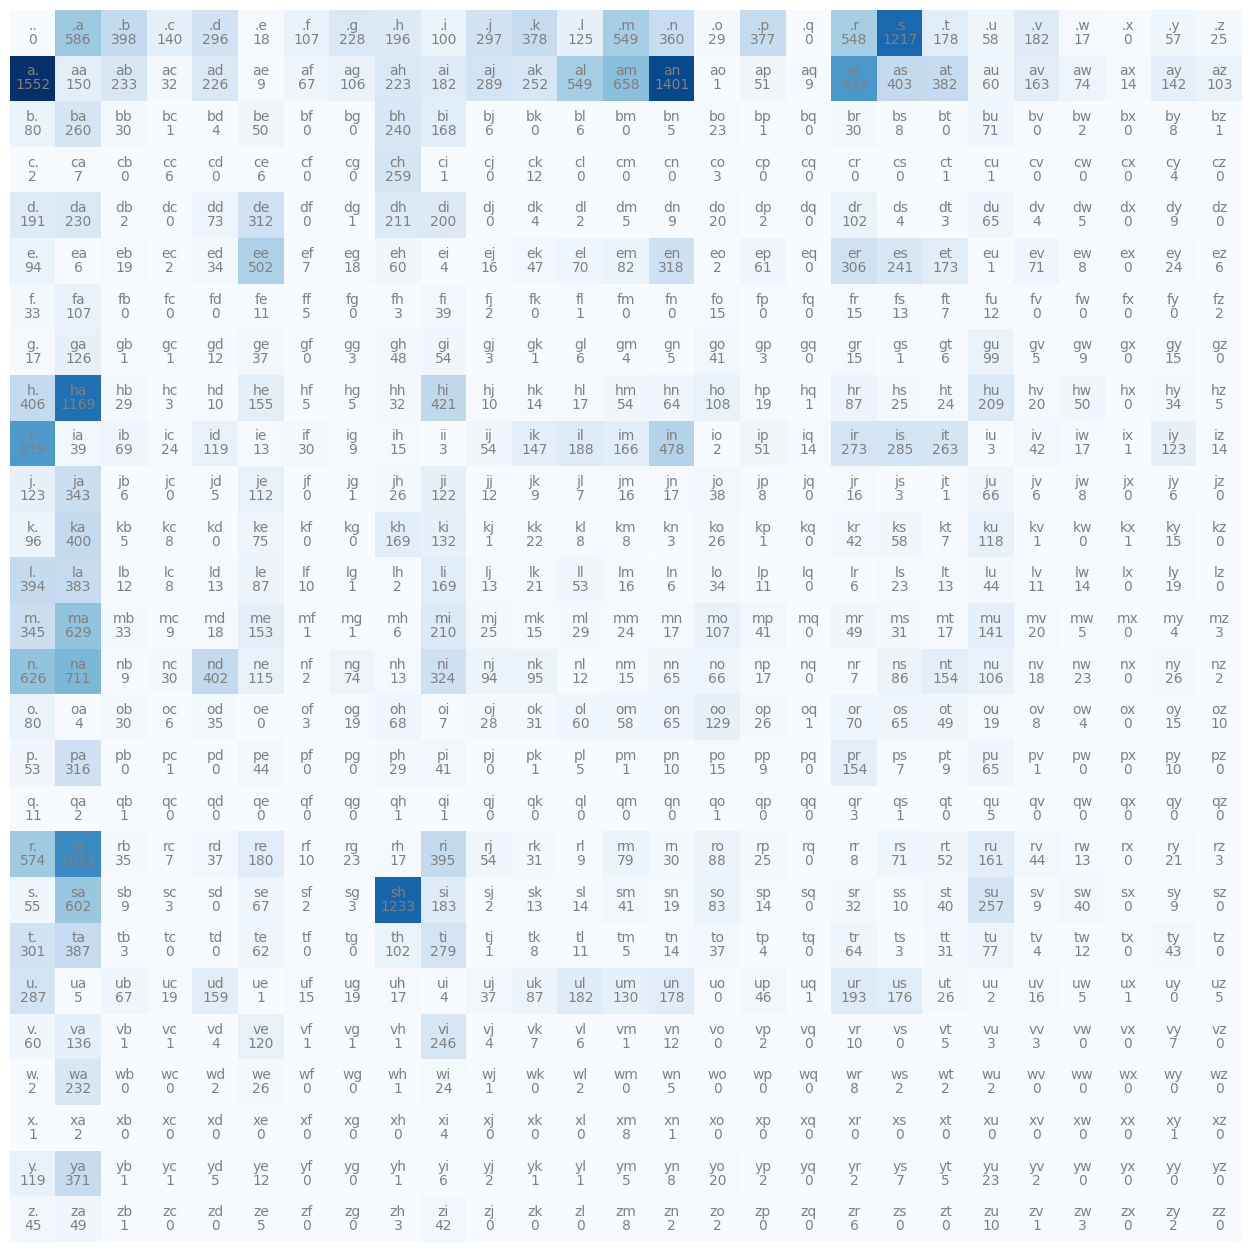

In [11]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap="Blues")
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis("off")

In [12]:
P = (N + 1).float()
P /= P.sum(1, keepdim=True)

In [13]:
gen = torch.Generator().manual_seed(69420)

for i in range(0, 3):
    out = []
    idx = 0
    while True:
        p = P[idx]
        idx = torch.multinomial(p, num_samples=1, replacement=True, generator=gen).item()
        out.append(itos[idx])
        if idx == 0:
            break
    print("".join(out))

sihususkhinmiydeeeerar.
ra.
su.


In [14]:
logLikelihood = 0.0
tot = 0

for n in names:
# for n in ["gopal"]:
    chrs = ["."] + list(n) + ["."]
    for ch1, ch2 in zip(chrs, chrs[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        prob = P[idx1, idx2]
        logProb = torch.log(prob)
        logLikelihood += logProb
        tot += 1

print(f'Log likelihood = {logLikelihood}') # we have to maximize the likelihood, which is equivalent to maximizing the log likelihood
print(f'Negative log likelihood = {-logLikelihood}') # which is equivalent to minimizing the neg log likelihood
print(f'Average negative log likelihood = {-(logLikelihood / tot)}') # which is equivalent to minimizing the avg neg log likelihood

Log likelihood = -112144.1796875
Negative log likelihood = 112144.1796875
Average negative log likelihood = 2.3579020500183105


In [15]:
import torch.nn.functional as F

In [16]:
X, y = [], []

for name in names[:1]:
    chrs = ["."] + list(name) + ["."]
    for ch1, ch2 in zip(chrs, chrs[1:]):
        print(ch1, ch2)
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        X.append(idx1)
        y.append(idx2)

X = torch.tensor(X)
y = torch.tensor(y)

. a
a a
a b
b i
i d
d .


In [17]:
X, y

(tensor([0, 1, 1, 2, 9, 4]), tensor([1, 1, 2, 9, 4, 0]))

In [18]:
Xenc = F.one_hot(X, num_classes=27).float()
Xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [19]:
W = torch.randn((27, 27), generator=gen, requires_grad=True)

# forward pass
logits = Xenc @ W # @ is the matrix multiplication operator
# logits are the log counts of the bigram occurance, very similar to the graph plotted previously. just the log of it
# so, upon matrix multiplication --> we get the logarthmic counts of the occurance of a bigram
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0101, 0.0163, 0.0187, 0.0521, 0.0179, 0.0182, 0.0879, 0.0209, 0.0091,
         0.0754, 0.0637, 0.0113, 0.0076, 0.0041, 0.0185, 0.0247, 0.0164, 0.0105,
         0.0273, 0.0070, 0.0071, 0.0057, 0.2064, 0.0493, 0.0106, 0.1038, 0.0993],
        [0.0310, 0.0223, 0.0085, 0.0146, 0.0164, 0.0951, 0.0308, 0.1114, 0.0099,
         0.0335, 0.0051, 0.0231, 0.0089, 0.0835, 0.0312, 0.0060, 0.0563, 0.0210,
         0.0135, 0.0227, 0.0394, 0.0424, 0.0061, 0.0182, 0.0547, 0.1853, 0.0090],
        [0.0310, 0.0223, 0.0085, 0.0146, 0.0164, 0.0951, 0.0308, 0.1114, 0.0099,
         0.0335, 0.0051, 0.0231, 0.0089, 0.0835, 0.0312, 0.0060, 0.0563, 0.0210,
         0.0135, 0.0227, 0.0394, 0.0424, 0.0061, 0.0182, 0.0547, 0.1853, 0.0090],
        [0.0099, 0.0203, 0.0063, 0.0445, 0.0094, 0.0020, 0.2834, 0.0021, 0.0225,
         0.0124, 0.0318, 0.0140, 0.0336, 0.0123, 0.0247, 0.0068, 0.1037, 0.1544,
         0.0327, 0.0193, 0.0127, 0.0038, 0.0424, 0.0196, 0.0546, 0.0054, 0.0154],
        [0.0296, 0.0085,

In [20]:
probs.shape

torch.Size([6, 27])

In [21]:
nlls = torch.zeros(6)

for i in range(0, 6):
    xItem = X[i].item()
    yItem = y[i].item()
    print("===")
    print(f'Bigram example {i + 1}: {itos[xItem]} {itos[yItem]} (indices {xItem}, {yItem})')
    print(f'Input to the neural network: {xItem}')
    print(f'Output probabilities from neural network: {probs[i]}')
    print(f'Label (actual next character): {yItem}')
    p = probs[i, yItem]
    print(f'Predicted probablility of the actual next character by the model: {p.item()}')
    logLikelihood = torch.log(p)
    print(f'Log likelihood: {logLikelihood.item()}')
    print(f'Negative log likelihood: {-(logLikelihood.item())}')
    nlls[i] = -(logLikelihood.item())
    print("---")
    print(f'Average negative log likelihood: {nlls.mean().item()}')

===
Bigram example 1: . a (indices 0, 1)
Input to the neural network: 0
Output probabilities from neural network: tensor([0.0101, 0.0163, 0.0187, 0.0521, 0.0179, 0.0182, 0.0879, 0.0209, 0.0091,
        0.0754, 0.0637, 0.0113, 0.0076, 0.0041, 0.0185, 0.0247, 0.0164, 0.0105,
        0.0273, 0.0070, 0.0071, 0.0057, 0.2064, 0.0493, 0.0106, 0.1038, 0.0993],
       grad_fn=<SelectBackward0>)
Label (actual next character): 1
Predicted probablility of the actual next character by the model: 0.016334865242242813
Log likelihood: -4.114453315734863
Negative log likelihood: 4.114453315734863
---
Average negative log likelihood: 0.685742199420929
===
Bigram example 2: a a (indices 1, 1)
Input to the neural network: 1
Output probabilities from neural network: tensor([0.0310, 0.0223, 0.0085, 0.0146, 0.0164, 0.0951, 0.0308, 0.1114, 0.0099,
        0.0335, 0.0051, 0.0231, 0.0089, 0.0835, 0.0312, 0.0060, 0.0563, 0.0210,
        0.0135, 0.0227, 0.0394, 0.0424, 0.0061, 0.0182, 0.0547, 0.1853, 0.0090],
   

In [22]:
loss = -probs[torch.arange(6), y].log().mean() # a simple method to get the negative log likelihood
loss.item()

3.597343683242798

In [23]:
# backward pass
W.grad = None # sets the gradients to 0
loss.backward()

In [24]:
W.data += - 0.1 * W.grad # gradient descent

In [25]:
# now, doing the same for the entire dataset

X, y = [], []

for name in names:
    chrs = ["."] + list(name) + ["."]
    for ch1, ch2 in zip(chrs, chrs[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        X.append(idx1)
        y.append(idx2)

X = torch.tensor(X)
y = torch.tensor(y)
num = X.nelement()
print("Number of examples:", num)

W = torch.randn((27, 27), generator=gen, requires_grad=True)

Number of examples: 47561


In [26]:
for k in range(0, 1000):
    # forward pass
    Xenc = F.one_hot(X, num_classes=27).float()
    logits = Xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(num), y].log().mean() # +  0.1 * (W ** 2).mean() # penalising weights so that they can be made 0, think of it as Ridge regression
    if (k + 1) % 50 == 0:
        print(f'Loss at pass {k + 1}:', loss.item())

    # backward pass
    W.grad = None
    loss.backward()

    # gradient descent
    W.data += - 50 * W.grad

Loss at pass 50: 2.3916585445404053
Loss at pass 100: 2.372638702392578
Loss at pass 150: 2.366560697555542
Loss at pass 200: 2.3635244369506836
Loss at pass 250: 2.3616790771484375
Loss at pass 300: 2.3604331016540527
Loss at pass 350: 2.35953426361084
Loss at pass 400: 2.3588573932647705
Loss at pass 450: 2.3583321571350098
Loss at pass 500: 2.357914686203003
Loss at pass 550: 2.357576370239258
Loss at pass 600: 2.3572967052459717
Loss at pass 650: 2.357062339782715
Loss at pass 700: 2.3568625450134277
Loss at pass 750: 2.356689691543579
Loss at pass 800: 2.356539249420166
Loss at pass 850: 2.3564062118530273
Loss at pass 900: 2.356287717819214
Loss at pass 950: 2.3561813831329346
Loss at pass 1000: 2.3560855388641357


In [27]:
for i in range(0, 10):
    out = []
    idx = 0
    while True:
        Xenc = F.one_hot(torch.tensor([idx]), num_classes=27).float()
        logits = Xenc @ W
        counts = logits.exp()
        probs = counts / counts.sum(1, keepdims=True)
        idx = torch.multinomial(probs, num_samples=1, replacement=True, generator=gen).item()
        out.append(itos[idx])
        if idx == 0:
            break
    print("".join(out))

mman.
aseku.
huleenisupani.
mangi.
paleremij.
ramshy.
var.
m.
gdekmdeeen.
t.
